In [1]:
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import talib as ta
import yfinance as yf

In [2]:
# current_path = os.getcwd()
# parent_dir = os.path.dirname(current_path)

# sys.path.insert(0,parent_dir)
# or
sys.path.append(os.path.abspath('../scripts')) 
# or
# os.chdir("../scripts")

In [3]:
from load_data import data_loader   
from visualize_stock_data import plot_stock,stock_moving_average, RSI_indicator, MACD_indicator, visualize_moving_average,visualize_RSI, visualize_MACD, visualize_daily_return
# from stock_data_analysis import Finanicial_Data  

In [4]:
# loader = Finanicial_Data()

In [4]:
data = '../dataset/AAPL_historical_data.csv'
apple_data = data_loader(data)

In [5]:
apple_data

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0


In [7]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


In [14]:
apple_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,moving_average,RSI,MACD,MACD_signal,MACD_hist
count,10998.000000,10998.000000,10998.000000,10998.000000,10998.000000,1.099800e+04,10998.000000,10998.000000,10994.000000,10993.000000,10965.000000,10965.000000,10965.000000
mean,22.299160,22.539055,22.068367,22.312754,21.494496,3.180806e+08,0.000752,0.001546,22.281132,53.091477,0.139020,0.137452,0.001568
std,46.003685,46.496031,45.540929,46.037660,45.561916,3.354523e+08,0.011753,0.083663,45.962208,20.548149,1.013181,0.955654,0.292496
min,0.049665,0.049665,0.049107,0.049107,0.037857,0.000000e+00,0.000000,0.000000,0.050893,2.762653,-6.673117,-5.815683,-2.510773
25%,0.299107,0.303710,0.290179,0.298549,0.241840,1.132545e+08,0.000000,0.000000,0.298996,37.368121,-0.007107,-0.006533,-0.004187
50%,0.531250,0.537946,0.522321,0.531250,0.432079,2.057412e+08,0.000000,0.000000,0.531027,53.348009,0.003685,0.003666,0.000123
75%,20.204196,20.389554,19.998036,20.196160,17.253029,3.985275e+08,0.000000,0.000000,20.145678,69.237505,0.065976,0.063689,0.005688
max,236.479996,237.229996,233.089996,234.820007,234.548523,7.421641e+09,0.250000,7.000000,232.062000,98.403038,8.948060,8.310411,2.379293


In [9]:
apple_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
# apple_data['moving_average'] = stock_moving_average(apple_data['Open'], window=5)

In [11]:
# apple_data['moving_average'] = apple_data['Open'].rolling(window=3).mean()

In [6]:
apple_data['Date'].unique()

array(['1980-12-12', '1980-12-15', '1980-12-16', ..., '2024-07-26',
       '2024-07-29', '2024-07-30'], dtype=object)

In [7]:
apple_data['moving_average'] = stock_moving_average(apple_data['Close'],window=5)
apple_data['RSI'] =  RSI_indicator(apple_data['Close'], window= 5)
apple_data['MACD'], apple_data['MACD_signal'], apple_data['MACD_hist']  = MACD_indicator(apple_data['Close'])
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
 

In [8]:
print(apple_data.dtypes) 

Date               object
Open              float64
High              float64
Low               float64
Close             float64
Adj Close         float64
Volume              int64
Dividends         float64
Stock Splits      float64
moving_average    float64
RSI               float64
MACD              float64
MACD_signal       float64
MACD_hist         float64
Daily_Return      float64
dtype: object


In [15]:
# apple_data['Close'] = pd.to_numeric(apple_data['Close'], errors='coerce')

In [15]:
# apple_data['SMA_10'] = ta.SMA(apple_data['Close'], timeperiod=10)  # 20-day simple moving average
# apple_data['RSI'] = ta.RSI(apple_data['Close'], timeperiod=4)       # 14-period RSI
# apple_data['MACD'], apple_data['MACD_signal'], apple_data['MACD_hist'] = ta.MACD(apple_data['Close'], fastperiod=16, slowperiod=12, signalperiod=5) #MACD

# # Print a few rows to see the indicators
# print(apple_data)

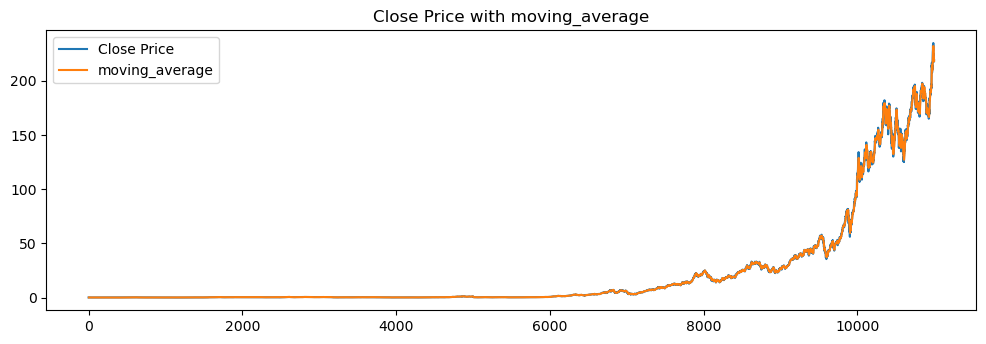

In [9]:


visualize_moving_average(apple_data)


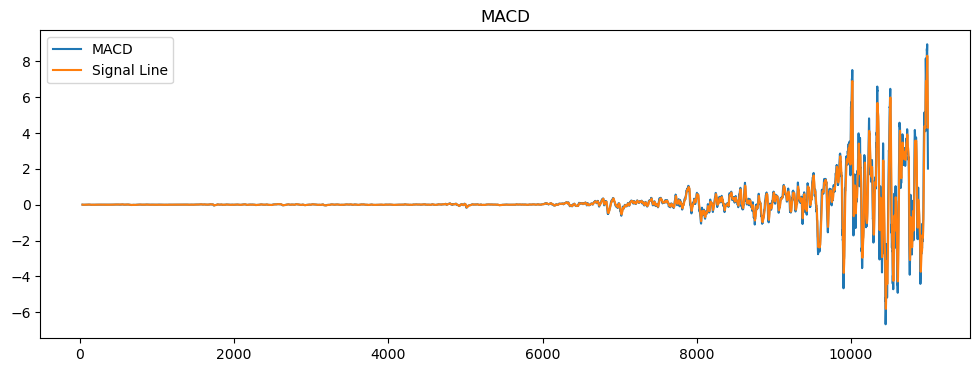

In [16]:

visualize_MACD(apple_data)

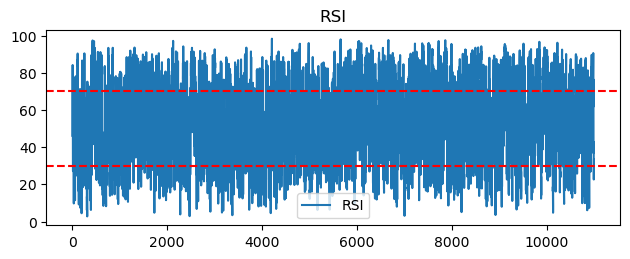

In [21]:
visualize_RSI(apple_data)

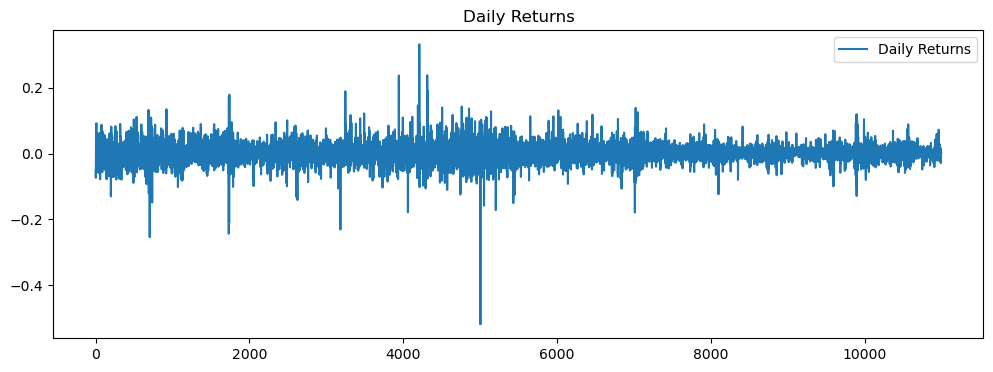

In [22]:
visualize_daily_return(apple_data)